In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob
from PIL import Image
import glob


In [4]:

objectpoints = []  #3D
imgpoints = []     #2D Image
chessboard_img = []

objp = np.zeros((6*9,3),np.float32) # y,x = 6,9 und 3 für x,z,y
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) #x,y coordinates

for filename in glob.glob('camera_cal/calibration*.jpg'):
    img=Image.open(filename)
    img = np.asarray(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
    if ret == True:
        imgpoints.append(corners)
        objectpoints.append(objp)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        chessboard_img.append(img)
        

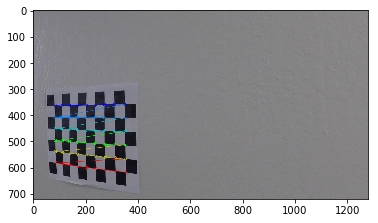

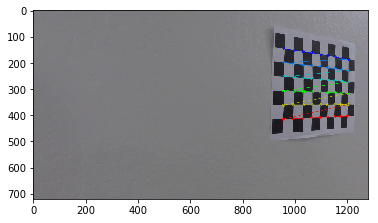

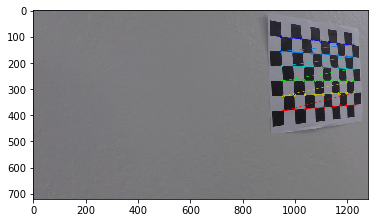

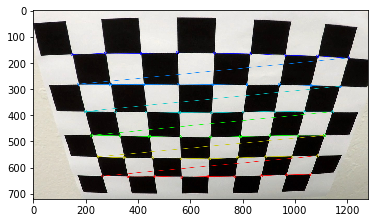

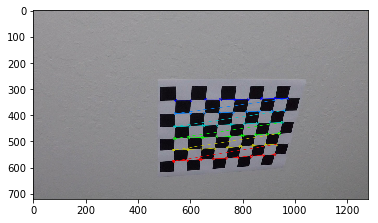

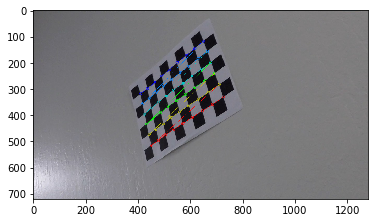

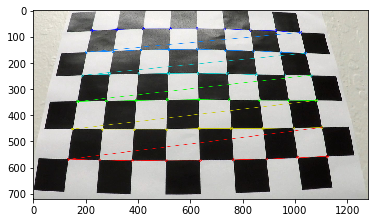

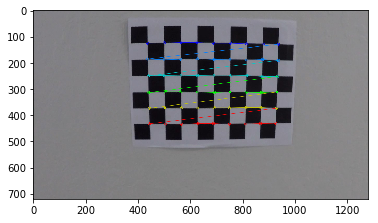

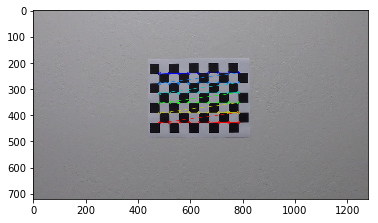

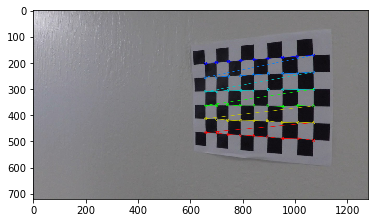

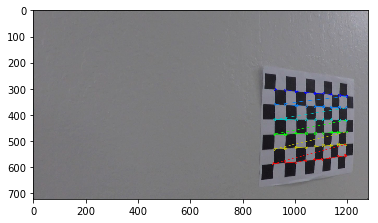

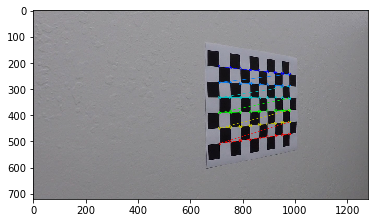

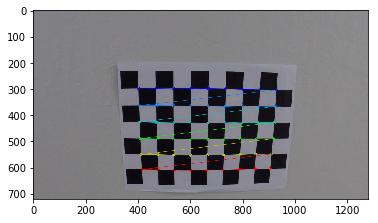

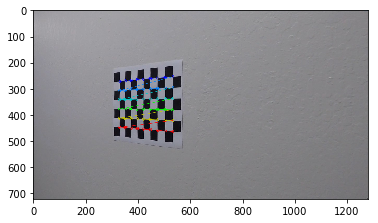

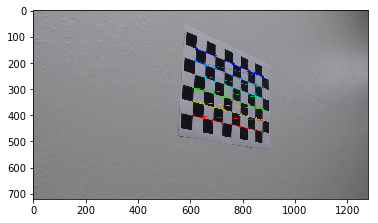

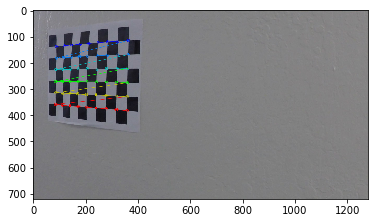

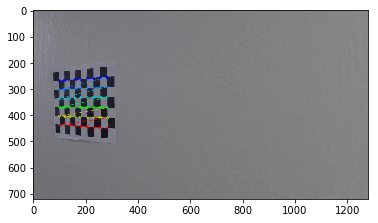

In [5]:
for i in chessboard_img:
    plt.imshow(i)
    plt.show()

In [6]:
# saving the objectpoints and imgpoints lists with pickle
import pickle
 
with open('objectpoints.pkl', 'wb') as f:
    pickle.dump(objectpoints, f)

with open('imgpoints.pkl', 'wb') as f:
    pickle.dump(imgpoints, f)

In [1]:
# READ with pickle 
import pickle
with open('objectpoints.pkl', 'rb') as f:
    objectpoints = pickle.load(f)
